# CogSci 2020 paper -- Analyses

This notebook produces the analyses in our paper "Birds and Words: Exploring environmental influences on folk categorization". 

In [3]:
# load libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

# some useful functions
def get_birdcounts(ebd_data):
	# read ebird count and name data
	bird_counts = {}

	science_name = list(ebd_data['SCIENTIFIC NAME'])

	i=0
	for bird_name in science_name:
		if bird_name in bird_counts.keys():
			bird_counts[bird_name] +=1
		else:
			bird_counts[bird_name] = 1

		i+=1

	return bird_counts


def get_basiclevel(zapotec_data):
	bird_sci2basic_names = {}

	basic_name = list(zapotec_data['folk_generic'])
	science_name = list(zapotec_data['species'])

	i=0
	for bird_name in science_name:
		bird_sci2basic_names[bird_name] = basic_name[i]
		i+=1

	return bird_sci2basic_names

def get_terminallevel(zapotec_data):
	bird_sci2terminal_names = {}

	terminal_name = list(zapotec_data['folk_specific'])
	science_name = list(zapotec_data['species'])

	i=0
	for bird_name in science_name:
		if bird_name in bird_sci2terminal_names.keys():
			bird_sci2terminal_names[bird_name].append(terminal_name[i])
		else:
			bird_sci2terminal_names[bird_name] = []
			bird_sci2terminal_names[bird_name].append(terminal_name[i])
		i+=1

	return bird_sci2terminal_names

/Users/josh/miniconda2/envs/py3test/lib/python3.6/site-packages/scipy/__init__.py:115: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.12.1)
  UserWarning)


## Load datasets
Here, we incorporate the following datasets ...

### Frequency data
Here we use eBird

In [4]:
# load ebird data
ebd_data = pd.read_csv('./data/ebird_MX-OAX_cogsci_clean.csv')
# get bird counts, index by species name
bird_counts = get_birdcounts(ebd_data)

### Naming data
We have precompiled this into a single dataframe (df) for the purposes of replicating these analyses.

In [5]:
# read full Zapotec data, including data on non-Zapotec birds
zapotec_data_all = pd.read_csv('./data/df_zapotec_fullfeats_cogsci2020.csv')
# make a df of only Zapotec data
zapotec_data_only = zapotec_data_all[zapotec_data_all['folk_generic'].notna()] 

basic_levels = get_basiclevel(zapotec_data_only)
basic_level_names = list(set(zapotec_data_only['folk_generic']))
terminal_names = get_terminallevel(zapotec_data_only)

In [30]:
zapotec_data_only

,species,common_name,mass,freq,folk_generic,folk_specific,clements_group,prototype,group_size_folk_generics,group_size_folk_specific,...,PC8,PC9,Beak_PC1,Beak_PC2,Beak_PC3,Beak_PC4,Realm,TrophicLevel,TrophicNiche,ForagingNiche
0,Myiarchus nuttingi,Nutting's Flycatcher,23.00,1903,mguîn̲-rchǔup,mguîn̲-rchǔup,"Tyrant Flycatchers: Pewees, Kingbirds, and Allies",0.0,2.0,2.0,...,0.018530,-0.112178,-0.149743,-0.162164,0.236782,0.150732,Neotropic,Omnivore,Invertivore,Invertivore sally surface
1,Sayornis nigricans,Black Phoebe,18.63,1918,mguîn̲-guiùu,mguîn̲-guiùu,"Tyrant Flycatchers: Pewees, Kingbirds, and Allies",0.0,1.0,1.0,...,0.052137,0.046456,-0.538515,0.022452,0.301204,-0.025784,Neotropic,Carnivore,Invertivore,Generalist
2,Amazilia rutila,Cinnamon Hummingbird,5.24,0,dzǐn̲g,dzǐn̲g,Hummingbirds,0.0,14.0,10.0,...,-0.155520,-0.002128,-0.687390,1.143144,0.216819,0.131604,Neotropic,Herbivore,Nectarivore,Nectarivore aerial
3,Tyrannus vociferans,Cassin's Kingbird,45.60,5119,cùchguêr,cùchguêr,"Tyrant Flycatchers: Pewees, Kingbirds, and Allies",0.0,4.0,3.0,...,0.012510,0.061365,0.368699,-0.114130,0.255070,0.004245,Nearctic,Carnivore,Invertivore,Invertivore sally air
4,Patagioenas fasciata,Band-tailed Pigeon,366.30,927,pàlôm,pàlôm-dán,Pigeons and Doves,0.0,2.0,1.0,...,0.182247,-0.111457,0.183448,0.116369,0.121061,-0.032545,Nearctic,Herbivore,Granivore,Granivore ground
5,Empidonax affinis,Pine Flycatcher,11.30,393,wǐt,wǐt,"Tyrant Flycatchers: Pewees, Kingbirds, and Allies",0.0,12.0,11.0,...,0.036864,0.009378,-0.863894,-0.031610,0.243015,0.032265,Neotropic,Carnivore,Invertivore,Generalist
6,Buteo brachyurus,Short-tailed Hawk,496.01,1314,msì,msì,"Vultures, Hawks, and Allies",0.0,7.0,3.0,...,0.010936,0.013531,1.071510,-0.444810,-0.067657,-0.074172,Neotropic,Carnivore,Vertivore,Vertivore air to surface
7,Aeronautes saxatalis,White-throated Swift,32.10,259,xlútsǐ,xlútsǐ-ngǎs,Swifts,0.0,7.0,3.0,...,-0.330202,0.021545,-2.070790,-0.585015,0.118502,-0.132901,Nearctic,Carnivore,Invertivore,Invertivore aerial
8,Amazilia beryllina,Berylline Hummingbird,4.50,6678,dzǐn̲g,dzǐn̲g,Hummingbirds,0.0,14.0,10.0,...,-0.142728,-0.013790,-0.806874,1.090724,0.050000,0.161141,Neotropic,Herbivore,Nectarivore,Nectarivore aerial
9,Leiothlypis celata,Orange-crowned Warbler,9.19,0,wǐt,wǐt,Wood-Warblers,0.0,12.0,11.0,...,-0.092296,-0.047869,-0.942694,-0.162598,0.010292,0.093823,Nearctic,Carnivore,Invertivore,Invertivore glean arboreal


## Analysis of category extensions

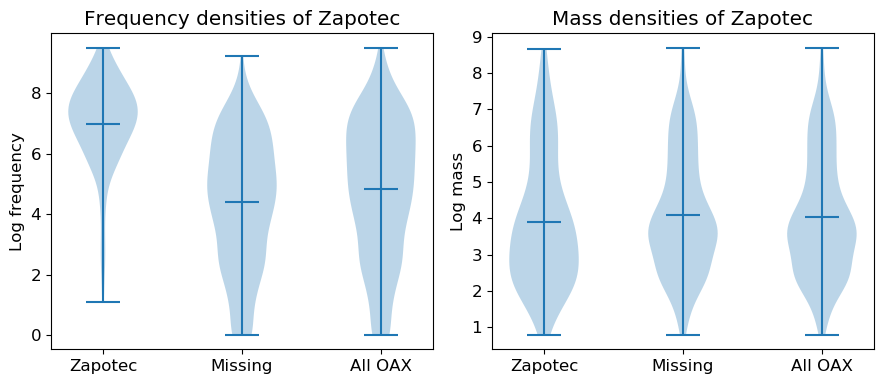

In [6]:
# Figure 1 in paper: What categories are give a name
# violin plot (with log frequency of occurrence)
bird_list = list(zapotec_data_only['species'])
freqs = list(zapotec_data_only['freq'])

data_zapotec = [np.log(i) for i in freqs if i >0]
data_all = [np.log(i) for i in bird_counts.values()]

missing_data = []
for birdcount in bird_counts.keys():
	if birdcount not in bird_list:
		missing_data.append(np.log(bird_counts[birdcount]))

# make figure
plt.figure(figsize=(9, 4), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 12})
plt.subplot(1,2,1)

pos = [1,2,3]
plotnames = ('Zapotec','Missing','All OAX')
plt.violinplot([data_zapotec,missing_data,data_all],pos,showmeans=True) 
plt.title('Frequency densities of Zapotec')
plt.xticks(pos,plotnames)
plt.ylabel('Log frequency')



zapotec_masses = {}
for zapotec_bird in basic_levels.keys():
	mass = float(zapotec_data_only[zapotec_data_only['species'] == zapotec_bird]['mass'])  
	if mass > 0:
		zapotec_masses[zapotec_bird] = mass

oax_masses = {}
for oax_bird in bird_counts.keys():
	mass = float(zapotec_data_all[zapotec_data_all['species'] == oax_bird]['mass'])
	if mass > 0:
		oax_masses[oax_bird] = mass
        
        
data_zapotec = [np.log(i) for i in zapotec_masses.values()]
data_all = [np.log(i) for i in oax_masses.values()]

missing_data = []
for birdmass in oax_masses.keys():
	if birdmass not in zapotec_masses.keys():
		missing_data.append(np.log(oax_masses[birdmass]))

plt.subplot(1,2,2)
pos = [1,2,3]
plotnames = ('Zapotec','Missing','All OAX')
plt.violinplot([data_zapotec,missing_data,data_all],pos,showmeans=True) 
plt.title('Mass densities of Zapotec')
plt.xticks(pos,plotnames)
plt.ylabel('Log mass')


plt.tight_layout()
plt.show()


### Analysis of category size

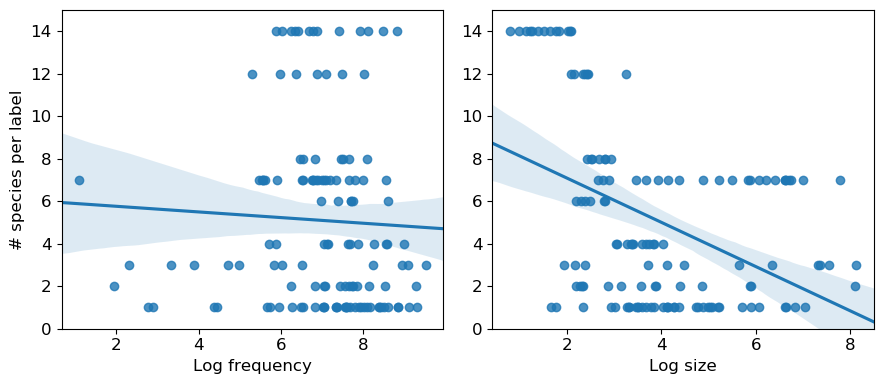

In [29]:
#
# Figure 2 in paper: category size plots
#
SSRR_species = {}
xs = []
ys = []
zs = []
for bird_species in bird_list:
    # get basic level

    if float(zapotec_data_only[zapotec_data_only['species'] == bird_species]['freq']) > 0.0:
	    basic_taxon = basic_levels[bird_species]
	    len_unique_species_in_basic = len(list(set(zapotec_data_only[zapotec_data_only['folk_generic'] == basic_taxon]['species'])))
	    SSRR_species[bird_species] = len_unique_species_in_basic
	    xs.append(float(zapotec_data_only[zapotec_data_only['species'] == bird_species]['mass']))
	    ys.append(SSRR_species[bird_species])
	    zs.append(float(zapotec_data_only[zapotec_data_only['species'] == bird_species]['freq']))
    

plt.figure(figsize=(9, 4), dpi=100, facecolor='w', edgecolor='k')
plt.title('Zapotec category organization')

plt.subplot(1,2,1)
ssrrdf = pd.DataFrame(list(zip(np.log(zs),ys)),columns =['log freq','num species'])
sns.regplot(x=ssrrdf["log freq"], y=ssrrdf["num species"])
plt.xlabel('Log frequency')
plt.ylabel('# species per label')
plt.ylim([0.,15.])
plt.yticks((0, 2, 4,6,8,10,12,14))


plt.subplot(1,2,2)
ssrrdf = pd.DataFrame(list(zip(np.log(xs),ys)),columns =['log size','num species'])
sns.regplot(x=ssrrdf["log size"], y=ssrrdf["num species"])
plt.xlabel('Log size')
plt.ylabel('')
plt.ylim([0.,15.])
plt.yticks((0, 2, 4,6,8,10,12,14))
plt.tight_layout()
plt.show()

In [27]:
slope, intercept, r_value, p_value, std_err = linregress(np.log(zs),np.log(ys))
print("Log Freq\nslope: %f    intercept: %f, p_val: %f" % (slope, intercept,p_value))
print("Category size R-squared: %f" % r_value**2)

slope, intercept, r_value, p_value, std_err = linregress(np.log(xs),np.log(ys))
print("Log Mass\nslope: %f    intercept: %f, p_val: %f" % (slope, intercept,p_value))
print("Category size R-squared: %f" % r_value**2)

Log Freq
slope: -0.043850    intercept: 1.537600, p_val: 0.431191
Category size R-squared: 0.004810
Log Mass
slope: -0.173697    intercept: 1.910424, p_val: 0.000180
Category size R-squared: 0.103397


## Analysis of category labels

Do frequency and mass influence the form of the name for each species? We focus on names at the folk-specific level and consider the following lexical properties of these names.

### Name Length

Zipf's Law (1949) is the well-established regularity that word lengths are inversely related to word frequency.



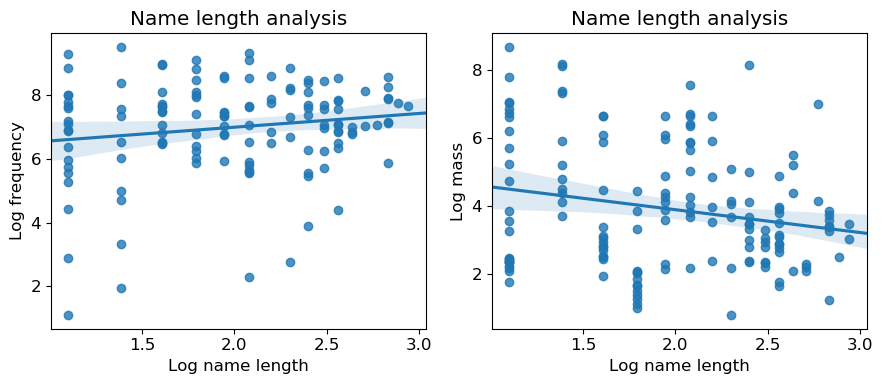

In [17]:
# relationship between length and frequency
names = list(zapotec_data_only[zapotec_data_only['freq']>0]['folk_specific'])
freqs = list(zapotec_data_only[zapotec_data_only['freq']>0]['freq'])
             
xs1 = [len(i) for i in names]
ys1 = freqs


plt.figure(figsize=(9, 4), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 12})
plt.subplot(1,2,1)

namelen_df = pd.DataFrame(list(zip(np.log(xs1),np.log(ys1))),columns =['log frequency','log name length'])
sns.regplot(x=namelen_df["log frequency"], y=namelen_df["log name length"])

plt.ylabel('Log frequency')
plt.xlabel('Log name length')
plt.title('Name length analysis')


# relationship between length and mass
names = list(zapotec_data_only['folk_specific'])
masses = list(zapotec_data_only['mass'])
             
xs2 = [len(i) for i in names]
ys2 = masses

plt.subplot(1,2,2)
namelen_df = pd.DataFrame(list(zip(np.log(xs2),np.log(ys2))),columns =['log mass','log name length'])
sns.regplot(x=namelen_df["log mass"], y=namelen_df["log name length"])

plt.ylabel('Log mass')
plt.xlabel('Log name length')
plt.title('Name length analysis')

plt.tight_layout()
plt.show()


In [19]:
slope, intercept, r_value, p_value, std_err = linregress(np.log(xs1),np.log(ys1))
print("Log Freq\nslope: %f    intercept: %f, p_val: %f" % (slope, intercept,p_value))
print("Name length R-squared: %f" % r_value**2)

slope, intercept, r_value, p_value, std_err = linregress(np.log(xs2),np.log(ys2))
print("Log Mass\nslope: %f    intercept: %f, p_val: %f" % (slope, intercept,p_value))
print("Name length R-squared: %f" % r_value**2)

Log Freq
slope: 0.430153    intercept: 6.134315, p_val: 0.073505
Name length R-squared: 0.024617
Log Mass
slope: -0.668809    intercept: 5.222261, p_val: 0.009767
Name length R-squared: 0.043394


### Compound names

Compound names are notated in Hunn's taxonomy with a dash ('-'), and we explored whether frequency and mass could predict whether the folk-specific name for a species is compound or monomial. 

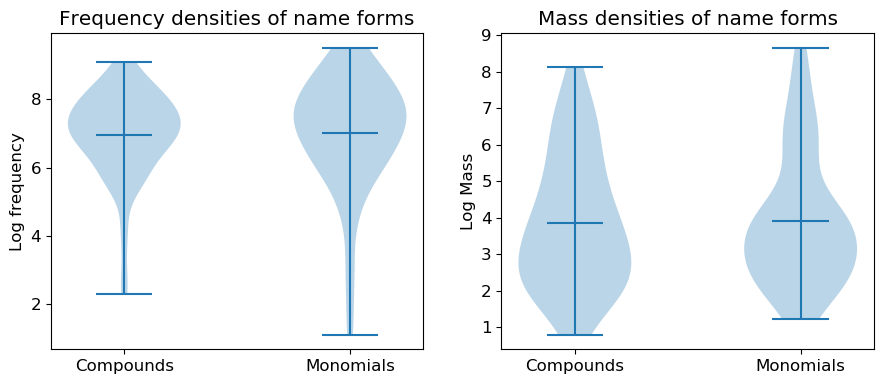

In [20]:
names = list(zapotec_data_only[zapotec_data_only['freq']>0]['folk_specific'])
freqs = list(zapotec_data_only[zapotec_data_only['freq']>0]['freq'])
monomials = []
compounds = []
for i in range(len(names)):
    if len(names[i].split('-')) > 1:
        if freqs[i] > 0:
            compounds.append(freqs[i])
    else:
        if freqs[i] > 0:
            monomials.append(freqs[i])

plt.figure(figsize=(9, 4), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 12})
plt.subplot(1,2,1)

# violin plot 
data_compounds = [np.log(i) for i in compounds]
data_monomials = [np.log(i) for i in monomials]

pos = [1,2]
plotnames = ('Compounds','Monomials')
plt.violinplot([data_compounds,data_monomials],pos,showmeans=True)
plt.title('Frequency densities of name forms')
plt.xticks(pos,plotnames)
plt.ylabel('Log frequency')

# do the same with mass
mass = list(zapotec_data_only['mass'])

monomials = []
compounds = []
for i in range(len(names)):
    if len(names[i].split('-')) > 1:
        compounds.append(mass[i])
    else:
        monomials.append(mass[i])

# violin plot 
data_compounds = [np.log(i) for i in compounds]
data_monomials = [np.log(i) for i in monomials]

plt.subplot(1,2,2)
pos = [1,2]
plotnames = ('Compounds','Monomials')
plt.violinplot([data_compounds,data_monomials],pos,showmeans=True)
plt.title('Mass densities of name forms')
plt.xticks(pos,plotnames)
plt.ylabel('Log Mass')

plt.tight_layout()
plt.show()

In [33]:
len(set(zapotec_data_only['folk_generic']))

68

### Prototypes

The literature on folk categorization proposes a link ...

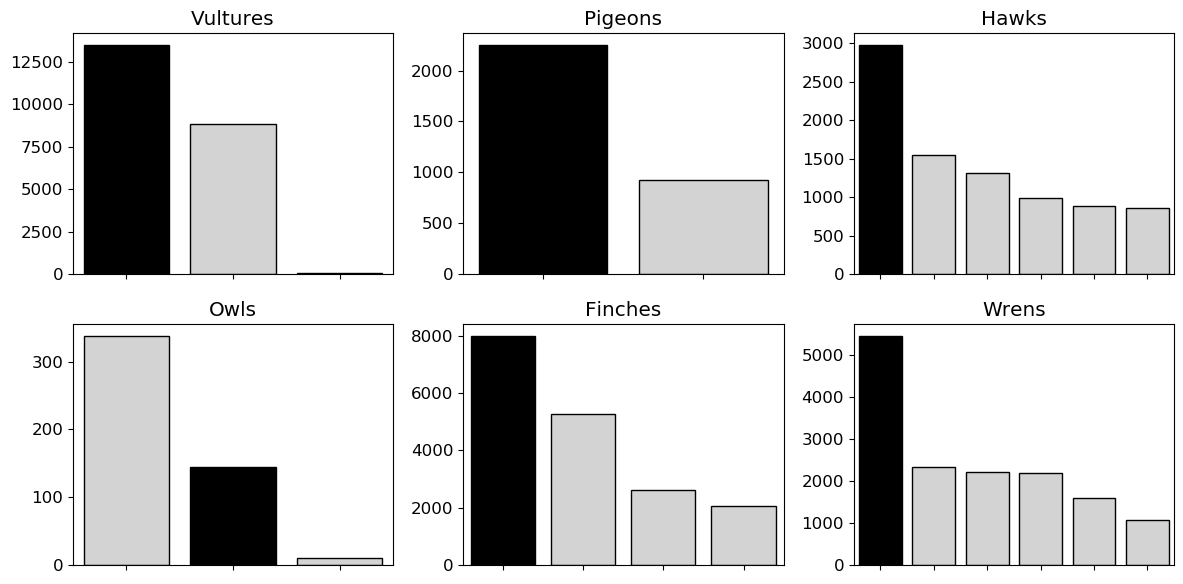

In [21]:
#
# Figure 3 in paper: Prototype plots
#

plt.rcParams.update({'font.size': 12})

def get_barheights_freq(bar_species,bird_list,df):
	heights = []
	for bird_name in bar_species:
		if bird_name in bird_list:
			heights.append(float(df[df['species'] == bird_name]['freq']))
		else:
			heights.append(0.0)

	return heights


prototypes = ['Cathartes aura','Buteo jamaicensis','Columba livia',
'Bubo virginianus','Thryomanes bewickii',
'Haemorhous mexicanus']


plt.figure(figsize=(12, 6), dpi=100, facecolor='w', edgecolor='k')
plt.subplot(2, 3, 1)

# vultures (3)
bar_species = ['Cathartes aura','Coragyps atratus','Sarcoramphus papa']
bar_labels = ('Turkey','Black','King')
subplot_title = 'Vultures'
heights = get_barheights_freq(bar_species,bird_list,zapotec_data_only)
pos = [1,2,3]
clrs = ['black','lightgrey','lightgrey']
sns.barplot(pos,heights,palette=clrs,edgecolor="Black")
plt.title(subplot_title)
plt.tick_params(labelbottom=False)

plt.subplot(2, 3, 2)
# pigeons (2)
bar_species = ['Columba livia','Patagioenas fasciata']
bar_labels = ('Rock','Band-tailed')
subplot_title = 'Pigeons'
heights = get_barheights_freq(bar_species,bird_list,zapotec_data_only)
pos = [1,2]
clrs = ['black','lightgrey']
sns.barplot(pos,heights,palette=clrs,edgecolor="Black")
plt.title(subplot_title)
plt.tick_params(labelbottom=False)

plt.subplot(2, 3, 3)
# hawks (6)
bar_species = ['Buteo jamaicensis','Accipiter cooperii','Buteo brachyurus','Buteo albonotatus','Falco peregrinus','Accipiter striatus']
bar_labels = ('Red-tailed','Coopers','Short-tailed','Zone-tailed','Peregrine Falcon','Sharp-shinned')
subplot_title = 'Hawks'
heights = get_barheights_freq(bar_species,bird_list,zapotec_data_only)
pos = [1,2,3,4,5,6]
plt.title(subplot_title)
clrs = ['black','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey']
sns.barplot(pos,heights,palette=clrs,edgecolor="Black")
plt.tick_params(labelbottom=False)

plt.subplot(2, 3, 4)
# owls (3)
bar_species = ['Ciccaba virgata','Bubo virginianus','Asio stygius']
bar_labels = ('Mottled','Great Horned','Stygian')
subplot_title = 'Owls'
heights = get_barheights_freq(bar_species,bird_list,zapotec_data_only)
pos = [1,2,3]
clrs = ['lightgrey','black','lightgrey']
sns.barplot(pos,heights,palette=clrs,edgecolor="Black")
plt.title(subplot_title)
plt.tick_params(labelbottom=False)

plt.subplot(2, 3, 5)
# finches (4)
bar_species = ['Haemorhous mexicanus','Icterus wagleri','Pheucticus melanocephalus','Piranga rubra']
bar_labels = ('House','Black-vented','Black-headed','Summer Tanager')
subplot_title = 'Finches'
heights = get_barheights_freq(bar_species,bird_list,zapotec_data_only)
pos = [1,2,3,4]
clrs = ['black','lightgrey','lightgrey','lightgrey']
sns.barplot(pos,heights,palette=clrs,edgecolor="Black")
plt.title(subplot_title)
plt.tick_params(labelbottom=False)


plt.subplot(2, 3, 6)
# wrens (6)
bar_species = ['Thryomanes bewickii','Catherpes mexicanus','Oreothlypis superciliosa','Troglodytes aedon','Henicorhina leucophrys','Salpinctes obsoletus']
bar_labels = ('Bewicks','Canyon','Crescent-chested','Brown-throated','Gray-breasted','Rock')
subplot_title = 'Wrens'
heights = get_barheights_freq(bar_species,bird_list,zapotec_data_only)
pos = [1,2,3,4,5,6]
clrs = ['black','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey']
sns.barplot(pos,heights,palette=clrs,edgecolor="Black")
plt.title(subplot_title)

plt.tick_params(labelbottom=False)
plt.tight_layout()
plt.show()